# Homework Assignment 4

#### Due: Friday April 6th, 11:59pm.

Save your file in **mp248/Assignment.4/Assignment.4.ipynb** on your Bitbucket repository.


#### Problem 1:

For this problem, we ask you to consider the single pendulum and double pendulums with friction, from *Dynamic.plots.1.ipynb* and *Dynamic.plots.2.ipynb*.   

(a) In *Dynamic.plots.1.ipynb* the single pendulum differential equation had the two system constants, $a \geq 0$ is what we called the *friction constant*, and $b > 0$ is the *mass/gravity constant*.  The differential equation had the form $\theta'' + a \theta' + b \sin \theta = 0$.   The *total energy* of the system is

$$E_{tot} = (\theta')^2 + 2b -2b\cos\theta$$

For the simulation to be accurate, the total energy of the system should dissipate according to the heat loss through friction. Thus we should have equality

$$\frac{dE}{dt} = -2a(\theta')^2$$

We call the right hand side of this equation the *theoretical power loss of the system*. If $E(t_i)$ represents the actual total energy of the system at time $t_i$, then the *actual power loss between frames* $t_i$ and $t_{i+1}$ would be the quantity $\frac{E(t_{i+1})-E(t_i)}{t_{i+1} - t_i} = \frac{\Delta E}{\Delta t}$. 

For the system with $a=0.1$, $b=1$, $\theta_0 = 0$ and $\theta'_0=10$, create a plot with one slider controlling the time step.  In your plot, show $\theta(t)$ as a function of time. In a text field (in the plot) present the maximum (absolute value) of the difference between the theoretical $-2a(\theta')^2$ power and the actual power loss $\frac{\Delta E}{\Delta t}$ between frames of the animation.  Call this quantity the power-loss-deviation (PLD) of the simulation, i.e. in your plot you should have a text field "MAX PLD: number". 

Ensure your time interval is long enough so that one can see the pendulum coming to rest (let's define this to be $E_{tot}(t_i) < 0.1$) for $t_i$ at the end of your interval.  

(b) Determine the how small $\Delta t$ needs to be to ensure the maximum PLD is less than *1.0*.

(c) A properly simulated solution to this differential equation has a horizontal asymptote an integer multiple of $2\pi$.  How small does $\Delta t$ need to be to discover the correct asymptote, and what is the asymptote?


For this problem, we ask you to consider the single pendulum and double pendulums with friction, from *Dynamic.plots.1.ipynb* and *Dynamic.plots.2.ipynb*.   

(a) In *Dynamic.plots.1.ipynb* the single pendulum differential equation had the two system constants, $a \geq 0$ is what we called the *friction constant*, and $b > 0$ is the *mass/gravity constant*.  The differential equation had the form $\theta'' + a \theta' + b \sin \theta = 0$.   The *total energy* of the system is

$$E_{tot} = (\theta')^2 + 2b -2b\cos\theta$$

For the simulation to be accurate, the total energy of the system should dissipate according to the heat loss through friction. Thus we should have equality

$$\frac{dE}{dt} = -2a(\theta')^2$$

We call the right hand side of this equation the *theoretical power loss of the system*. If $E(t_i)$ represents the actual total energy of the system at time $t_i$, then the *actual power loss between frames* $t_i$ and $t_{i+1}$ would be the quantity $\frac{E(t_{i+1})-E(t_i)}{t_{i+1} - t_i} = \frac{\Delta E}{\Delta t}$. 

For the system with $a=0.1$, $b=1$, $\theta_0 = 0$ and $\theta'_0=10$, create a plot with one slider controlling the time step.  In your plot, show $\theta(t)$ as a function of time. In a text field (in the plot) present the maximum (absolute value) of the difference between the theoretical $-2a(\theta')^2$ power and the actual power loss $\frac{\Delta E}{\Delta t}$ between frames of the animation.  Call this quantity the power-loss-deviation (PLD) of the simulation, i.e. in your plot you should have a text field "MAX PLD: number". 

Ensure your time interval is long enough so that one can see the pendulum coming to rest (let's define this to be $E_{tot}(t_i) < 0.1$) for $t_i$ at the end of your interval. 

In [1]:
from scipy.integrate import odeint
import matplotlib.animation as animation
%matplotlib nbagg  
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

<IPython.core.display.Javascript object>


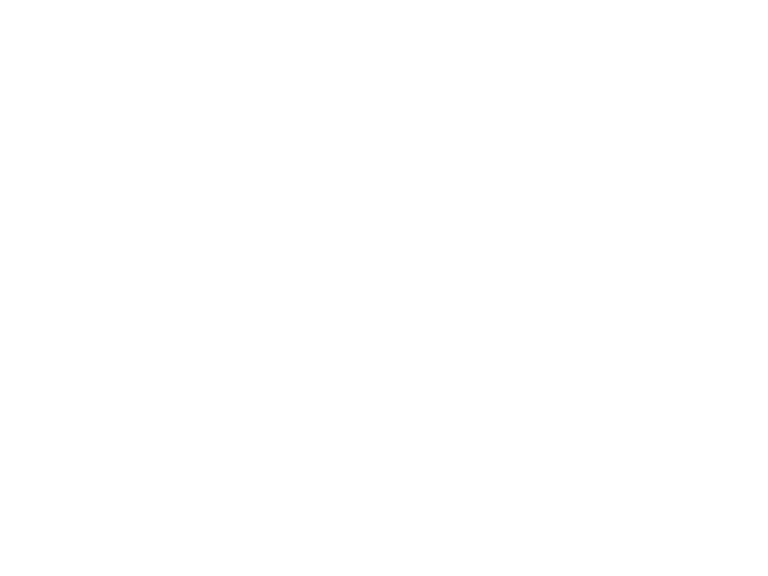

In [2]:
fig,ax = plt.subplots()
plt.subplots_adjust(right=0.65)

t = [0.0]
th = [0.0]
tp = [10.0]
E = []
dt=0.001                                           
a=0.1
b=1
T = 100
EE=100
R1 = 1.0
R2 = 1.0

dedt = -dt*a*tp[0]*tp[0]
t = np.arange(0.0, T, dt)
Et = lambda tp,th,b,a: tp*tp+2*b-2*b*np.cos(th)

SOL = odeint(lambda th, t, a, b: [th[1], -a*th[1]-b*np.sin(th[0])], [0,10],t, args=(a,b))

th = [x[0] for x in SOL]
tp = [x[1] for x in SOL]


for i in range(0,int(T/dt)-1):
    
    EE = abs((Et(tp[i+1],th[i+1],b,a)-Et(tp[i],th[i],b,a))-dedt)
    E.append(EE)

etot = plt.text(0.6*(R1+R2), 0.9*(R1+R2), 'Etot: ')
etot.set_text("MAX PLD: number: %6.6f" % max(E))

l, = plt.plot(t, th, 'r')
ax.set_xlim(left=0.0, right=T)


axts = plt.axes([0.7, 0.9, 0.18, 0.04])
tsval = Slider(axts, 'T step', dt, T/2-1, valinit=dt)


def update(val):
    E = []
    t = np.arange(0.0, T, tsval.val)
    
    SOL = odeint(lambda th, t, a, b: [th[1], -a*th[1]-b*np.sin(th[0])], [0,10],t, args=(a,b))
    th = [x[0] for x in SOL]
    tp = [x[1] for x in SOL]
    
    dedt = -dt*a*tp[0]*tp[0]
    ax.set_ylim(bottom=-max(th)+5, top=max(th)+5)
    for i in range(0,int(T/tsval.val)-1):

        EE = abs((Et(tp[i+1],th[i+1],b,a)-Et(tp[i],th[i],b,a))-dedt)
        E.append(EE)
    
    etot.set_text("MAX PLD: number: %6.6f" % max(E))
    l.set_xdata(t)
    l.set_ydata(th)
    
    fig.canvas.draw_idle()

tsval.on_changed(update)

plt.show()


#### Problem 2: 

We roughly repeat Problem 1, but for the double pendulum.  For this problem we ask you to extend the code from *Dynamic.plots.2.ipynb*.

(a) Make a plot of $\theta_1$ and $\theta_2$ vs. $t$ for the double pendulum with initial conditions 
$$ \theta_1(0) = \pi \hskip 1cm \theta_2(0) = 0$$
$$ \theta_1'(0) = 0 \hskip 1cm \theta_2'(0) = 10$$
$$m_1 = 1 \hskip 1cm m_2 = 1$$
$$r_1 = 1 \hskip 1cm r_2 = 1$$
$$k_1 \ 0.1 \hskip 1cm k_2 = 0.1$$
$$ g = 10$$

Have a slider that controls the number of steps in the numerical integration.   Have your plot run long-enough so that the asymptotic behaviour of $\theta_1$ and $\theta_2$ is apparent, in particular both trend towards integer multiples of $2 \pi$.

(b) How small does $\Delta t$ need to be to see this asymptotic behaviour reliably, and what are the integer multiples for $\theta_1$ and $\theta_2$ respectively? 


In [3]:
import sympy as sp

m1, m2, k1, k2, r1, r2, g, t = sp.symbols("m_1 m_2 k_1 k_2 r_1 r_2 g t")
## theta_i we give symbol ti
t1 = sp.Function("θ_1")(t)
t2 = sp.Function("θ_2")(t)
w1 = sp.Derivative(t1, t)
w2 = sp.Derivative(t2, t)

ti = sp.Function("θ_i")(t)
wi = sp.Derivative(ti, t)

R = sp.Function("R")
L = sp.Function("L")

T, V = sp.symbols("T V")

In [4]:
Teq = sp.Eq(T, (1/2)*m1*r1**2*w1**2 + \
            m2*r1*r2*w1*w2*sp.cos(t1-t2)+ \
            (1/2)*m2*r1**2*w1**2+ \
            (1/2)*m2*r2**2*w2**2)
## we forgot the 3rd term in class!
sp.pprint(Teq)

                          2                         2                         
             2 ⎛d        ⎞             2 ⎛d        ⎞                          
T = 0.5⋅m₁⋅r₁ ⋅⎜──(θ₁(t))⎟  + 0.5⋅m₂⋅r₁ ⋅⎜──(θ₁(t))⎟  + m₂⋅r₁⋅r₂⋅cos(θ₁(t) - θ
               ⎝dt       ⎠               ⎝dt       ⎠                          

                                                  2
      d         d                    2 ⎛d        ⎞ 
₂(t))⋅──(θ₁(t))⋅──(θ₂(t)) + 0.5⋅m₂⋅r₂ ⋅⎜──(θ₂(t))⎟ 
      dt        dt                     ⎝dt       ⎠ 


In [5]:
Veq = sp.Eq(V, -m1*g*r1*sp.cos(t1) - \
            m2*g*(r1*sp.cos(t1)+r2*sp.cos(t2)))
sp.pprint(Veq)

V = -g⋅m₁⋅r₁⋅cos(θ₁(t)) - g⋅m₂⋅(r₁⋅cos(θ₁(t)) + r₂⋅cos(θ₂(t)))


In [6]:
## lagrangian

Leq = sp.Eq(L, Teq.args[1] - Veq.args[1])
print("Lagrangian")
sp.pprint(Leq)

Lagrangian
                                                                              
                                                                         2 ⎛d 
L = g⋅m₁⋅r₁⋅cos(θ₁(t)) + g⋅m₂⋅(r₁⋅cos(θ₁(t)) + r₂⋅cos(θ₂(t))) + 0.5⋅m₁⋅r₁ ⋅⎜──
                                                                           ⎝dt

        2                         2                                           
       ⎞             2 ⎛d        ⎞                                d         d 
(θ₁(t))⎟  + 0.5⋅m₂⋅r₁ ⋅⎜──(θ₁(t))⎟  + m₂⋅r₁⋅r₂⋅cos(θ₁(t) - θ₂(t))⋅──(θ₁(t))⋅──
       ⎠               ⎝dt       ⎠                                dt        dt

                                2
                   2 ⎛d        ⎞ 
(θ₂(t)) + 0.5⋅m₂⋅r₂ ⋅⎜──(θ₂(t))⎟ 
                     ⎝dt       ⎠ 


In [7]:
Req = sp.Eq(R, (1/2)*k1*w1**2 + (1/2)*k2*(w2-w1)**2)
sp.pprint(Req)

                      2                                   2
           ⎛d        ⎞           ⎛  d           d        ⎞ 
R = 0.5⋅k₁⋅⎜──(θ₁(t))⎟  + 0.5⋅k₂⋅⎜- ──(θ₁(t)) + ──(θ₂(t))⎟ 
           ⎝dt       ⎠           ⎝  dt          dt       ⎠ 


In [8]:
## i = 1
LEM1 = (-sp.Derivative(Leq.args[1], t1) +\
        sp.Derivative(Req.args[1], w1) + sp.Derivative(Leq.args[1], w1, t)).doit().simplify()
LEM2 = (-sp.Derivative(Leq.args[1], t2) +\
        sp.Derivative(Req.args[1], w2) + sp.Derivative(Leq.args[1], w2, t)).doit().simplify()

In [9]:
sp.pprint(LEM1)

                                                                              
                                                         d                  d 
1.0⋅g⋅m₁⋅r₁⋅sin(θ₁(t)) + 1.0⋅g⋅m₂⋅r₁⋅sin(θ₁(t)) + 1.0⋅k₁⋅──(θ₁(t)) + 1.0⋅k₂⋅──
                                                         dt                 dt
                                                                              

                                          2                       2           
                 d                    2  d                    2  d            
(θ₁(t)) - 1.0⋅k₂⋅──(θ₂(t)) + 1.0⋅m₁⋅r₁ ⋅───(θ₁(t)) + 1.0⋅m₂⋅r₁ ⋅───(θ₁(t)) + 1
                 dt                       2                       2           
                                        dt                      dt            

                                          2                                   
                               ⎛d        ⎞                                    
.0⋅m₂⋅r₁⋅r₂⋅sin(θ₁(t) - θ₂(t))⋅⎜──(θ₂(t))⎟  + 1.0⋅

In [10]:
sp.pprint(LEM2)

                                                                              
                                d                  d                          
1.0⋅g⋅m₂⋅r₂⋅sin(θ₂(t)) - 1.0⋅k₂⋅──(θ₁(t)) + 1.0⋅k₂⋅──(θ₂(t)) - 1.0⋅m₂⋅r₁⋅r₂⋅si
                                dt                 dt                         
                                                                              

                            2                                     2           
                 ⎛d        ⎞                                     d            
n(θ₁(t) - θ₂(t))⋅⎜──(θ₁(t))⎟  + 1.0⋅m₂⋅r₁⋅r₂⋅cos(θ₁(t) - θ₂(t))⋅───(θ₁(t)) + 1
                 ⎝dt       ⎠                                      2           
                                                                dt            

            2       
        2  d        
.0⋅m₂⋅r₂ ⋅───(θ₂(t))
            2       
          dt        


In [11]:
## solve for theta_1'' and theta_2''
SOL = sp.solve((LEM1, LEM2), sp.Derivative(t1, t, 2), sp.Derivative(t2, t, 2))
sp.pprint(SOL)

⎧                 ⎛                                                           
⎪                 ⎜                        d              d                   
⎪  2         - r₁⋅⎜g⋅m₂⋅r₂⋅sin(θ₂(t)) - k₂⋅──(θ₁(t)) + k₂⋅──(θ₂(t)) - m₂⋅r₁⋅r₂
⎨ d               ⎝                        dt             dt                  
⎪───(θ₁(t)): ─────────────────────────────────────────────────────────────────
⎪  2                                                                          
⎩dt                                                                           

                               2⎞                         ⎛                   
                    ⎛d        ⎞ ⎟                         ⎜                   
⋅sin(θ₁(t) - θ₂(t))⋅⎜──(θ₁(t))⎟ ⎟⋅cos(θ₁(t) - θ₂(t)) + r₂⋅⎜g⋅m₁⋅r₁⋅sin(θ₁(t)) 
                    ⎝dt       ⎠ ⎠                         ⎝                   
──────────────────────────────────────────────────────────────────────────────
                                          2    ⎛   

In [12]:
T1pp = SOL[sp.Derivative(t1,t,2)].simplify()
T2pp = SOL[sp.Derivative(t2,t,2)].simplify()

In [13]:
## As a test to see if these ODEs have no mistakes
##  dE/dt = -2R

test=sp.Derivative(Teq.args[1]+Veq.args[1], t).doit().simplify()
test=test.xreplace({sp.Derivative(t1,t,2): T1pp, sp.Derivative(t2,t,2): T2pp})
test = test.simplify()
sp.pprint( (test + 2*Req.args[1]).simplify() )

0


In [14]:
## We want to make this into a callable function of theta_1, theta_2, theta_1', theta_2'
## and we want it to be reasonably fast. 

## technique 1: subst and evalf() very slow
## technique 2: lambdify in sympy
## technique 3 (new): is called ufuncify  -- we will use this. 

## first step is to replace all occurences of theta_1(t) as fcn of time with dummy variable
## similarly replace theta_1'(t) with dummy variable

w1, w2, t1, t2 = sp.symbols("w_1 w_2 t_1 t_2")

xT1pp = T1pp
xT1pp = xT1pp.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})
xT2pp = T2pp
xT2pp = xT2pp.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})

In [15]:
sp.pprint(xT2pp)

      ⎛                                                                       
m₂⋅r₂⋅⎝g⋅m₁⋅r₁⋅sin(t₁) + g⋅m₂⋅r₁⋅sin(t₁) + k₁⋅w₁ + k₂⋅w₁ - k₂⋅w₂ + m₂⋅r₁⋅r₂⋅w₂
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                         m₂⋅r₁

2             ⎞                             ⎛                                 
 ⋅sin(t₁ - t₂)⎠⋅cos(t₁ - t₂) - r₁⋅(m₁ + m₂)⋅⎝g⋅m₂⋅r₂⋅sin(t₂) - k₂⋅w₁ + k₂⋅w₂ -
──────────────────────────────────────────────────────────────────────────────
   2 ⎛           2              ⎞                                             
⋅r₂ ⋅⎝m₁ - m₂⋅cos (t₁ - t₂) + m₂⎠                                             

            2             ⎞
 m₂⋅r₁⋅r₂⋅w₁ ⋅sin(t₁ - t₂)⎠
───────────────────────────
                           
                           


In [16]:
## let's make it callable
## t1pp will be a callable function and you give it arguments
## r1 -- distance from the first bearing to the 2nd -- 1st arm length
## r2 -- distance from 2nd bearing to end of pendulum -- 2nd arm length

from sympy.utilities.autowrap import ufuncify
t1pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT1pp)
t2pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT2pp)

th1=np.pi
th2=0
tp1=0
tp2=10
m1 = 1
m2 = 1
r1 = 1
r2 = 1
k1 = 0.1
k2 = 0.1
g=10



TH = [th1, th2, tp1, tp2]

def theODE(TH, t, r1, r2, m1, m2, k1, k2, g):
    return [TH[2], TH[3], \
            t1pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g), \
            t2pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g)]

#### Problem 2: 

We roughly repeat Problem 1, but for the double pendulum.  For this problem we ask you to extend the code from *Dynamic.plots.2.ipynb*.

(a) Make a plot of $\theta_1$ and $\theta_2$ vs. $t$ for the double pendulum with initial conditions 
$$ \theta_1(0) = \pi \hskip 1cm \theta_2(0) = 0$$
$$ \theta_1'(0) = 0 \hskip 1cm \theta_2'(0) = 10$$
$$m_1 = 1 \hskip 1cm m_2 = 1$$
$$r_1 = 1 \hskip 1cm r_2 = 1$$
$$k_1 \ 0.1 \hskip 1cm k_2 = 0.1$$
$$ g = 10$$

Have a slider that controls the number of steps in the numerical integration.   Have your plot run long-enough so that the asymptotic behaviour of $\theta_1$ and $\theta_2$ is apparent, in particular both trend towards integer multiples of $2 \pi$.

(b) How small does $\Delta t$ need to be to see this asymptotic behaviour reliably, and what are the integer multiples for $\theta_1$ and $\theta_2$ respectively? 

In [17]:
X = theODE([th1, th2, tp1, tp2], 0, r1, r2, m1, m2, k1, k2, g)
print(X)

[0, 10, -1.4654943925052066e-14, -1.0000000000000147]


<IPython.core.display.Javascript object>


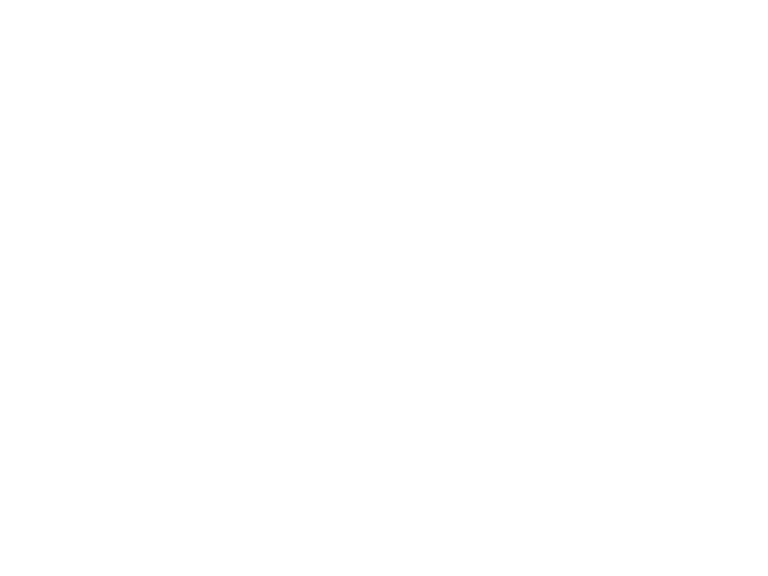

In [18]:
fig,ax = plt.subplots()

plt.subplots_adjust(right=0.65)

T = 500
dt = 0.01
t = np.arange(0.0, T, dt)



SOL = odeint(theODE,TH,t,args = (r1, r2, m1, m2, k1, k2, g))

th1 = [x[0] for x in SOL]
th2 = [x[1] for x in SOL]

l, = plt.plot(t,th2, 'b')
n, = plt.plot(t,th1, 'r')

ax.set_xlim(left=0.0, right=T)
#ax.set_ylim(bottom=-100, top=100)

axts = plt.axes([0.7, 0.9, 0.18, 0.04])
tsval = Slider(axts, 'T step', dt, T/20-1, valinit=dt)


def update(val):
    E = []
    t = np.arange(0.0, T, tsval.val)
    
    SOL = odeint(theODE,TH,t,args = (r1, r2, m1, m2, k1, k2, g))
    th1 = [x[0] for x in SOL]
    th2 = [x[1] for x in SOL]
        
    ax.set_ylim(bottom=-max(np.concatenate([th1,th2])), top=max(np.concatenate([th1,th2])))
    l.set_xdata(t)
    l.set_ydata(th1)
    n.set_xdata(t)
    n.set_ydata(th2)
    
    fig.canvas.draw_idle()

tsval.on_changed(update)

plt.show()

In [19]:
A = np.arange(0.0001, 2, 0.001)

for i in A:    
    t = np.arange(0.0001, T, i)

    SOL = odeint(theODE,TH,t,args = (r1, r2, m1, m2, k1, k2, g))
    th1 = [x[0] for x in SOL]
    th2 = [x[1] for x in SOL]
    for j in range(len(th1)-6):
    
        if(th1[len(th1)-1] == 0 and th2[len(th1)-1] == 2*np.pi):
            print(i)

$\theta_1$ trends to $0\pi$ and $\theta_2$ trends to $2\pi$, provided $\Delta t < 40/3000$. 

#### Problem 3: 

We want to analyze and model the wave data from Lab 3 in Part I in more detail. Read the data as you did in Lab 3. The data has now changed because we are at a different date. Recall that each row contains a number of quantaties for each hour of each day over the past three weeks. Here we are interested in the distrubution of wind speeds and if and how they correlate with wave heights.

**3.1**

Read the data and make a histogram of the wind speed using $n = 10$ bins. Print a formatted statement specifying the mean of the wind speed distribution.

In [43]:
fname = "46206.txt"

with open(fname) as f:
    bleep =[]
    content = f.readlines()
    
    key = []
    keys = content[0].translate({ord(c) : None for c in '\n'})
    keys = keys.split(" ")

    for i in range(14):
        if(keys[i] != ''):
            key.append(keys[i])

    mList = []
    
    
    for i in range(2, len(content)):
        lines = []
        line = content[i].translate({ord(c) : None for c in '\n'})
        line = line.split(" ")
        for j in range(20):
            if(line[j] != '' and line[j] != 'MM' ):
                lines.append(line[j])
        #print(lines)
        
        dat = {key[j] : lines[j] for j in range(len(lines))}
        
        mList.append(dat)
        
        
        
    
#print(mList)

In [64]:
## next, let's make the records more useful. 
print(mList[1])
print(mList[2])
import datetime as dt

## let's make the:
##  python datetime objects for incident_datetime, updated_at, created_at
WS = []
for x in mList:
    WS.append(float(x['WSPD']))


#print(WS)

{'#YY': '2018', 'MM': '04', 'DD': '09', 'hh': '22', 'mm': '00', 'WDIR': '40', 'WSPD': '7.0', 'GST': '8.0', 'WVHT': '1.8', 'DPD': '11'}
{'#YY': '2018', 'MM': '04', 'DD': '09', 'hh': '21', 'mm': '00', 'WDIR': '40', 'WSPD': '7.0', 'GST': '8.0', 'WVHT': '1.9', 'DPD': '11'}


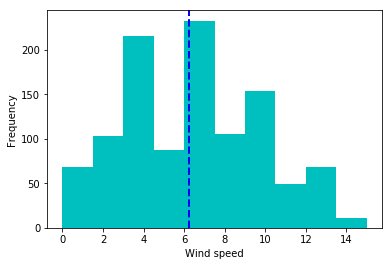

Mean of wind speed =  6.220091324200913


In [45]:
%matplotlib inline
from statistics import *



#plt.hist(WS, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Wind speed')


result = plt.hist(WS, bins=10, color='c')

plt.axvline(mean(WS), color='b', linestyle='dashed', linewidth=2,label = mean(WS))
plt.show()
print('Mean of wind speed = ',mean(WS))

**3.2**

Normalize the data so that the integral of the histogram is unity. Fit the normalized wind speed distribution with a the probability density function of a standard normal distribution. Plot the normalized data and the probability density function.

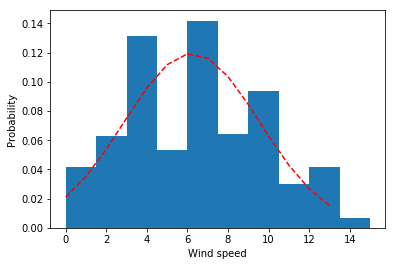

In [42]:
def nor(x):
    
    return 1/np.sqrt(2*np.pi*variance(WS))*np.exp(-pow((x-mean(WS)),2)/(2*variance(WS)))
x = np.arange(0,14,1)

plt.plot(nor(x),'r--')

plt.hist(WS, normed=True, bins=10)
plt.ylabel('Probability')
plt.xlabel('Wind speed')
plt.show()

**3.3**

Plot the wave height vs. wind speed. Using your own Pearson's r coefficient function determine that coefficient for the data sets wind speed and waveheight. A simply model may predict that once the wind starts increasing it may take a while for the wave height to follow. Modify your plot of wave height vs. wind speed so that it can apply an `hour_offset` so that you plot the wave height at `t + hour_offset` vs. windspeed at time `t` (remember that in the data file the latest measurements are in the top row and following rows go backward in time). 

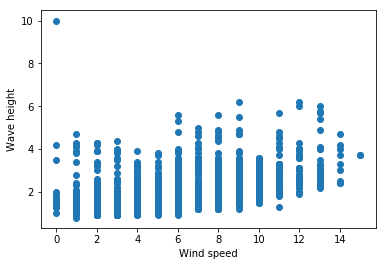

In [80]:
fig,ax = plt.subplots()

WH = []
for x in mList:
    WH.append(float(x['WVHT']))
    
plt.ylabel('Wave height')
plt.xlabel('Wind speed')

ax.scatter(WS,WH)


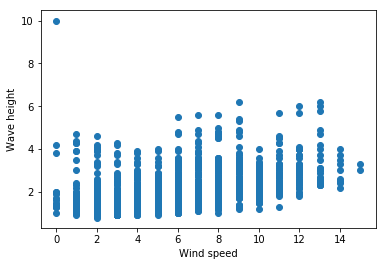

In [79]:
fig,ax = plt.subplots()

WHH = []
WSH = []
for i in range(1,len(WH)):
    WHH.append(WH[i])
    WSH.append(WS[i-1])
    
plt.ylabel('Wave height')
plt.xlabel('Wind speed')

ax.scatter(WSH,WHH)

**3.4**

Determine Pearson's r coefficient for `hour_offset` in the range `[0,10]`. Plot Pearson's r coefficient against `hour_offset`. Overplot a least-square fit of a $4^{th}$ order polynomial. Print a formatted sentence that states the value of the `hour_offset` for the maximum correlation between wave height vs. wind speed. (Do not read off the maximum, but use a an expression that will alway print the right off set no matter what the data set is. Remember it changes every day!).